In [1]:
!git clone https://github.com/renatoparedes/scikit-neuromsi.git
!cd scikit-neuromsi && git checkout dev
!cd scikit-neuromsi && pip install -e .
!pip install jax==0.3.25
!pip install jaxlib==0.3.25

Cloning into 'scikit-neuromsi'...
remote: Enumerating objects: 1376, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 1376 (delta 95), reused 94 (delta 52), pack-reused 1230
Receiving objects: 100% (1376/1376), 1.80 MiB | 6.68 MiB/s, done.
Resolving deltas: 100% (866/866), done.
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/scikit-neuromsi
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.2/441.2 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... don

# Scikit-NeuroMSI Tutorial

This tutorial is intended to serve as a guide for using `Scikit-NeuroMSI` to implement neurocomputational models of multisensory integration.

## General imports

The first thing we will do is import the necessary libraries. In general you will need the following:

- skneuromsi (*skneuromsi*) is the library that we present in this tutorial.
- numpy (*numpy*) this library will allow you to perform numerical computations.
- matplotlib (*matplotlib.pyplot*) this librarly will allow you to visualise your results.

Note: In this tutorial we assume that you already have a basic knowledge of `numpy` and `matplotlib` for scientific computing.

In [1]:
import skneuromsi
import numpy as np
import matplotlib.pyplot as plt

## Implementation of the Alais and Burr bimodal integration model

To easily implement the model developed by Alais and Burr (2004) you can import the corresponding module and instatiate the `AlaisBurr2004` class: 

In [2]:
from skneuromsi.mle import AlaisBurr2004

model = AlaisBurr2004()
model

The model object has a built-in run method:

In [3]:
model.run

<function skneuromsi.mle._alais_burr2004.AlaisBurr2004.run(*, auditory_position=-5, visual_position=5, auditory_sigma=3.0, visual_sigma=3.0)>

By calling this method we can observe its arguments:

- `auditory_position`: The position where the auditory stimulus is delivered (in degrees).
- `visual_position`: The position where the visual stimulus is delivered (in degrees).
- `auditory_sigma`: Standard deviation of the auditory estimate.
- `visual_sigma`: Standard deviation of the visual estimate.

Now let's run the model for equidistant auditory and visual locations:

In [4]:
res = model.run(visual_position=-5, auditory_position=5)
res

<NDResult 'AlaisBurr2004', modes=['auditory' 'visual' 'multi'], times=1, positions=4000, positions_coordinates=1, causes=False>

The model outputs one `NDResult` object containing the results of both unisensory estimators and the multisensory estimator. To make sense of our results, let's visualise the output using its built-in `plot` method:

<Axes: title={'center': 'AlaisBurr2004 - Time 0'}, xlabel='positions', ylabel='values'>

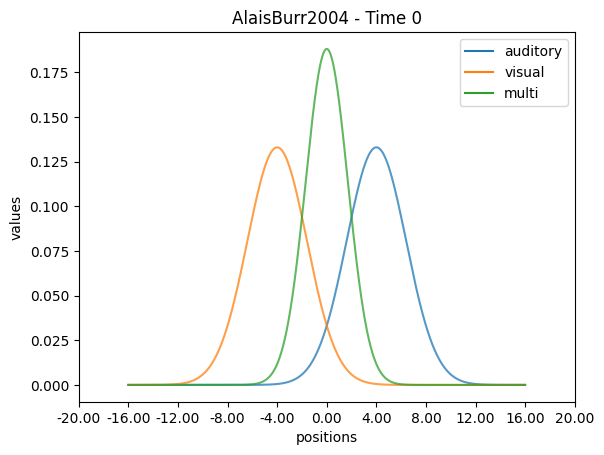

In [5]:
res.plot()

The plot shows how both auditory and visual estimates are combined into a single multisensory estimate. Now let's try a different configuration of the model run:

<Axes: title={'center': 'AlaisBurr2004 - Time 0'}, xlabel='positions', ylabel='values'>

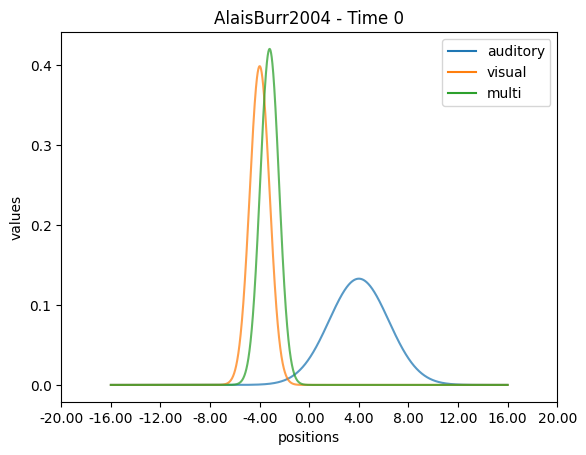

In [6]:
alter_res = model.run(
    visual_position=-5, auditory_position=5, visual_sigma=1, auditory_sigma=3
)
alter_res.plot()

In this new configuration we increased the precision of the visual estimate. By doing so, the multisensory estimate of the stimulus location is dramatically biased towards the visual estimate.

The opposite happens if we decrease the visual stimulus precision:

<Axes: title={'center': 'AlaisBurr2004 - Time 0'}, xlabel='positions', ylabel='values'>

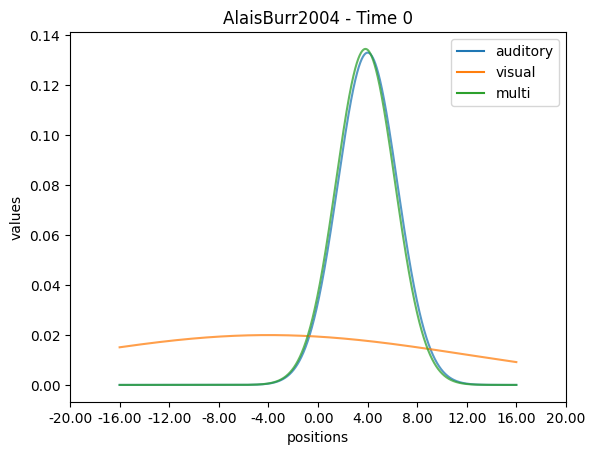

In [7]:
alter_res = model.run(
    visual_position=-5, auditory_position=5, visual_sigma=20, auditory_sigma=3
)
alter_res.plot()

By manipulating the precision of the unisensory estimates you've explored computationally the principles of the MLE estimation behind the model. Refer to the [documentation](https://scikit-neuromsi.readthedocs.io/en/latest/skneuromsi.html#skneuromsi-alais-burr2004-module) for further information about parameters to manipulate.

> This demonstration of the Alais and Burr model mechanics is inspired in the Computational Cognitive Neuroscience course materials developed by [Dr. Peggy Series](https://homepages.inf.ed.ac.uk/pseries/index.html) at The University of Edinburgh.  

### Exploration of the model object

By calling the model using the `vars` function you can explore its main built-in parameters and methods:

In [8]:
vars(model)

{'_mode0': 'auditory',
 '_mode1': 'visual',
 '_position_range': (-20, 20),
 '_position_res': 0.01,
 '_time_range': (1, 1),
 '_time_res': 1.0,
 'run': <function skneuromsi.mle._alais_burr2004.AlaisBurr2004.run(*, auditory_position=-5, visual_position=5, auditory_sigma=3.0, visual_sigma=3.0)>}

- `mode0`: Name of the first sensory modality defined in the model.
- `mode1`: Name of the second sensory modality defined in the model.
- `position_range`: The range of possible positions where the stimulus could be delivered (in degrees).
- `position_res`: The resolution of the range of possible positions where the stimulus could be delivered (in degrees).
- `time_range`: The range of possible times when the stimulus could be delivered. Here is set to 1 because the model has no temporal dimension.
- `time_res`: The resolution of the range of possible times when the stimulus could be delivered.
- `run`: Executes the model and saves the result. 

We can re-implement Alais and Burr (2004) model with different sensory modalities and position ranges by modifying the initial parameters of the model:

<Axes: title={'center': 'AlaisBurr2004 - Time 0'}, xlabel='positions', ylabel='values'>

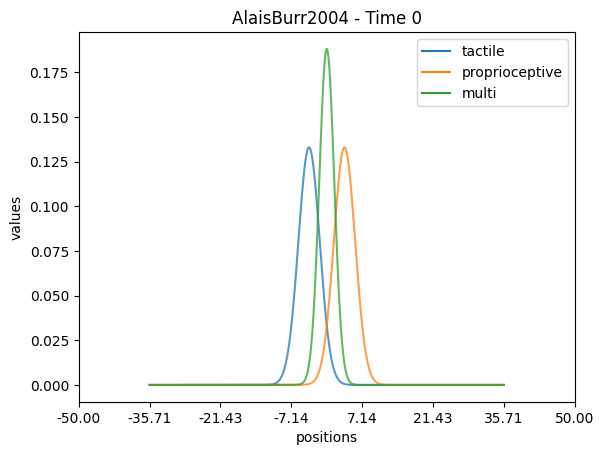

In [9]:
model = AlaisBurr2004(
    mode0="tactile", mode1="proprioceptive", position_range=(-50, 50)
)
res = model.run()
res.plot()

## Implementation of the Kording Bayesian Causal Inference model

You can implement the model Causal Inference model developed by Kording et al. (2007) by importing the corresponding module and instantiating the `Kording2007` class:

In [10]:
from skneuromsi.bayesian import Kording2007

model = Kording2007(position_range=(-20, 20))
model

You can refer to the [documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api.html#module-skneuromsi-kording2007) for more details about the available parameters.

Let's run the model for two conflicting stimulus locations:

<Axes: title={'center': 'Kording2007 - Time 0'}, xlabel='positions', ylabel='values'>

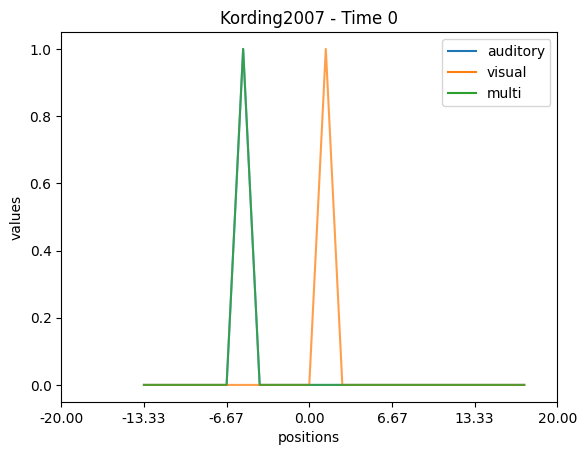

In [11]:
res = model.run(auditory_position=-15, visual_position=15)
res.plot()

The model outputs the unisensory estimates as being apart and centered around the given locations (-15 and 15 for the auditory and visual modality respectively).

Now let's see what happens if we reduce the distance of the stimuli:

<Axes: title={'center': 'Kording2007 - Time 0'}, xlabel='positions', ylabel='values'>

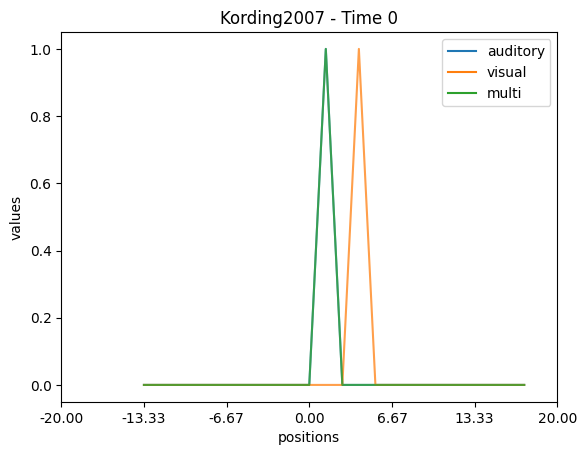

In [12]:
res = model.run(auditory_position=-5, visual_position=5)
res.plot()

The model shows how the less precise stimulus location (in this case, visual) is biased towards the more precise one. This happens because the model is computing the unisensory estimates based on the probability of the stimuli originating from a common source. 

We can directly observe the probability of the stimuli originating from a common cause:

In [13]:
print("p(C=1):", res.e_["p_common_cause"])
print("C:", res.causes_)

p(C=1): [0.58724699]
C: 1


> This demonstration of the Bayesian Causal Inference model mechanics is inspired in the tutorial of the [BCIT Toolbox](https://github.com/multisensoryperceptionlab/BCIT/blob/master/Documentation/BCIT_Documentation_5.1.2017.pdf).

## Build your own Scikit-NeuroMSI model!

You can implement your own model by importing the `SKNMSIMethodABC` method from the `core` module and creating a class calling such method. 

Such class must have four attributes to define the model's identity and input/output modalities: 
- `_model_name`: Name of the model.
- `_model_type`: Classification of the model (e.g. MLE, Bayesian, Neural, etc).
- `_run_input`: Modality specific parameters computed by the model. 
- `_run_output`: Modality specific results delivered by the model.

Furthermore, the class must have six managed attributes (properties) defined in the `init` method:
- `mode0`: Name of sensory modality 0.
- `mode1`: Name of sensory modality 1.
- `position_range`: Range of positions encoded by the model.
- `position_res`: Resolution of positional encoding.
- `time_range`: Range of times encoded by the model.
- `time_res`: Resolution of time encoding.

> The model may include more than two sensory modalities, as long as they are properly defined in the class.

Finally, the class must have two methods to specify the model execution:
- `set_random`: Sets random seed (if required).
- `run`: Executes the model

Here a template of a Scikit-NeuroMSI model class:

In [19]:
from skneuromsi.core import SKNMSIMethodABC


class MyMLEModel(SKNMSIMethodABC):
    _model_name = "MyMLEModel"
    _model_type = "MLE"

    _run_input = [
        {"target": "auditory_position", "template": "${mode0}_position"},
        {"target": "visual_position", "template": "${mode1}_position"},
    ]

    _run_output = [
        {"target": "auditory", "template": "${mode0}"},
        {"target": "visual", "template": "${mode1}"},
    ]

    def __init__(
        self,
        *,
        mode0="auditory",
        mode1="visual",
        position_range=(0, 29),
        position_res=1,
        time_range=(1, 2),
        time_res=1,
    ):
        self._mode0 = mode0
        self._mode1 = mode1
        self._position_range = position_range
        self._position_res = float(position_res)
        self._time_range = time_range
        self._time_res = float(time_res)

    # PROPERTY ================================================================

    @property
    def mode0(self):
        return self._mode0

    @property
    def mode1(self):
        return self._mode1

    @property
    def time_range(self):
        return self._time_range

    @property
    def time_res(self):
        return self._time_res

    @property
    def position_range(self):
        return self._position_range

    @property
    def position_res(self):
        return self._position_res

    # MODEL RUN ================================================================

    def set_random():
        pass

    def run(auditory_position, visual_position):
        ...

For more details about model building, please refer to the [documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api.html#module-skneuromsi.core). 